<font size=6>**Introduction to Classical Statistics**</font>

<div style="border: 1px solid lightgray; padding: 10px; background-color: #f9f9f9;">

<font size=1>

    Summer School for AstroStatistics in Crete, 2025

The content presented in this notebook is the original work of the authors, unless specified otherwise.
Any publicly available material incorporated is properly credited to its respective sources.
All references to published papers, datasets, and software tools are duly acknowledged.
The original content of this notebook is licensed under the GNU General Public License v3.0 (GNU GPLv3).
</font>
</div>

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

This notebook serves as a recap of the definitions in classical statistics, and it forms the basis upon which we build the rest of the terminology and tools we present during the school.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import minimize
import seaborn as sns
# Set up a fancy plot style (you can comment it out without consequences)
import sys; sys.path.append('../src'); import plot_style

# Probability

The fundamental concept in statistics is the probability, denoted as:

$$\Large P(A)$$

which represents the frequency of the occurance of an event $A$ (or our belief in a statement).

The basic property of a probability is that

$$\Large  0 \leq P(A) \leq 1 $$

where 0 is the value of an impossible event, while 1 that of a certain event!

## Probability calculus

1. In most cases, A is not certain. There is a scenario of A not happening. This event is "complementary" to A:

$$\Large  P(A^c) = P(\bar{A}) =  1 - P(A) $$

2. This can be extended to a series of alternative scenarios/events: A, B, C, ...

$$\Large  P(A) + P(B) + P(C) + \cdots = 1 $$

> Note that the events are alternatives: when one is true, the others are false!

3. Sum rule: the probability of either A or B happening is equal to the sum of the probabilities minus the probability of both happening:

$$\Large  P(A \cup B) = P(A \text{ or } B) = P(A) + P(B) - P(A \cap B) = P(A) + P(B) - P(A \text{ and } B)$$


![AandB](images/A_B.png)

## Conditional probability

The probability of $A$ given $B$, is the probability of $A$ happening given that $B$ is true as well:

$$\Large  P(A | B) $$

> The conditional probability is useful to express dependencies between events.


## Factoring probabilities

The **joint** probability of $A$ and $B$ can be expressed using the conditional probability:

$$\Large P(A \text{ and } B) =  P(A, B) = P(A|B) P(B)$$

which simply states that the probability of both $A$ and $B$ happening is equal to the probability of A given B, times the probability of $B$.

> Factorization is a way to **break** the expressions into simpler, or more understood terms!

## Independence

If $A$ and $B$ are completely independent, i.e. whether $A$ is true or false has nothing to do with the state of $B$, then the conditional probability is equal to the probability of the event itself:

$$\Large  P(A | B) = P(A) $$

which simplifies the factorization:

$$\Large P(A, B) = P(A) P(B) $$

> Independence is a useful property (or assumption) which simplifies probability terms and conditional probabilities.

## Marginalization

The probability of $A$ can be expressed as the probability of A and B plus the probability of A and not B:

$$\Large  P(A) = P(A, B) + P(A, \bar{B}).$$

Or if $B$ has multiple *mutually exclusive* and *exhaustive* outcomes $B_1$, $B_2$, $\dots$, $B_k$, such that $P(B_1)+P(B_2)+\cdots+P(B_k)=1$:

$$\Large  P(A) = \sum\limits_{i=1}^k P(A, B_i) $$

> Marginalization is a way to **introduce** other events / parameters / models in the probability of interest.

# Continuous variables

## Probability density

What if we don't have distinct events, and our set is infinite?

This is typical of continuous variables, such as magnitudes, colors, luminosities, mass, radii, etc.

Let's load SDSS data of white dwarfs of spectral type DB (ie., no hydrogen but helium absoption lines) [1]

[1] Kleinman, S. J., “SDSS DR7 White Dwarf Catalog”, <i>The Astrophysical Journal Supplement Series</i>, vol. 204, no. 1, IOP, 2013. doi:10.1088/0067-0049/204/1/5.

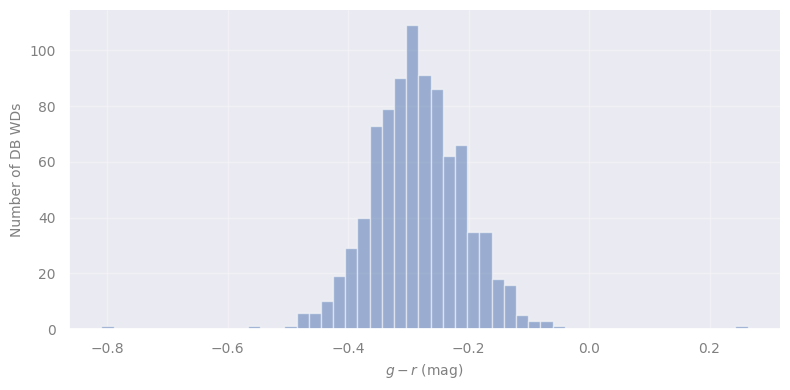

In [2]:
# let's get the data...
DB_WDs = np.load("data/DB_kleinman.npz")['a']
# ...and compute the g-r color 
g_r = DB_WDs["g"] - DB_WDs["r"]

plt.figure()
plt.hist(g_r, bins="fd", alpha=0.5)
plt.xlabel("$g-r$ (mag)")
plt.ylabel("Number of DB WDs")
plt.show()

Q: What is the probability of a DB WD to have $g-r = -0.3$?

In [4]:
# computing the fraction of values with g-r = -0.3
# find how many items match the value exactly
# mean provides their frequency, so the probability
print(f"P(g-r = {-0.3:.6f}) = {np.mean(g_r == -0.3):.4f}")

# equivalent to :
# print((g_r == -0.3).sum()/len(g_r))

P(g-r = -0.300000) = 0.0000


In [5]:
# finding the value closest to -0.3 and 
# computing the fraction of the data having it
value_close_to_it = g_r[np.argmin(np.abs(g_r - (-0.3)))]
print(f"P(g-r = {value_close_to_it:.6f}) = {np.mean(g_r == value_close_to_it):.4f}")

# equivalent to 
# print((g_r == value_close_to_it).sum()/len(g_r))
# or even:
# print( 1/ len(g_r))

P(g-r = -0.300028) = 0.0011


Consequently, for continuous $x$, the quantity $P(x)$ will always be 0! On the other hand, we can calculate the probabilities in a given range of values. For example, the probability of $g-r < -0.3$?

$$\Large P(g-r < -0.3)$$

In [7]:
# the fraction of colors less than -0.3
np.mean(g_r < -0.3)

0.4198645598194131

which is complementary to the alternative scenario, $g-r \geq -0.3$:

$$\Large P(g-r \geq -0.3)$$

In [8]:
# the fraction of colors greater or equal to -0.3
np.mean(g_r >= -0.3)

0.5801354401805869

Therefore, $P(x)$ can still be used as a **probability density** which is supposed to be multiplied by $dx$:

$$\Large  P(x) \; dx \simeq P(x < x' < x+\Delta x) \; \Delta x$$


The total probability is therefore:

$$\Large \int\limits_{-\infty}^{+\infty} P(x)\,dx = 1 $$


From this, it's easy to see that...
> ..the probability density $P(x)$ has unit, that of $x^{-1}$

Probability density functions are functions that describe useful probability distributions. The most famous and useful of all... the **normal** or **Gaussian** distribution:

$$\Large f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left[ -\frac{\left(x-\mu\right)^2}{2\sigma^2} \right] $$

where $\mu$ and $\sigma$ are the mean value and standard deviation. If our data follow the normal distribution, then the sample mean and stadard deviation can be used to express the distribution function with this parametric formula!

<div class="alert alert-block alert-warning" style="margin-top: 20px">

# Exercise 1:

**Objective:** Draw the sample and the corresponding normal distribution.

**Task:** It this exercise you are asked to fill in the missing code in order to plot a histogram of the sample along with a Gaussian distribution that best describes it. For this you need to perform the following:
    
1. Find the mean and the standard deviation of the sample (check [numpy's `np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [`np.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html)). 

2. Restrict the $x$ values within 5 sigmas around the mean.

3. Calculate the Gaussian PDF values.
    
4. Add the necessary quantities in the plot functions.    
</div>

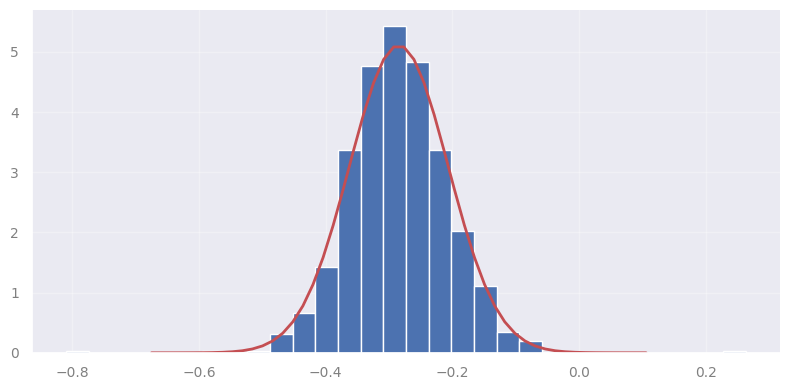

In [16]:
sample_mean = np.mean(g_r)
sample_std = np.std(g_r)

# let's plot 5 sigmas around the mean value...
x_values = np.linspace(sample_mean-5*sample_std, sample_mean+5*sample_std, 50)
# ...the Gaussian PDF
y_values = 1 / np.sqrt(2*np.pi*sample_std**2.0) * np.exp(-(x_values-sample_mean)**2.0/(2*sample_std**2.0))

plt.figure()
plt.hist(g_r, bins=30, density=True)
plt.plot(x_values, y_values, "r-")
plt.show()

<div class="alert alert-danger" role="alert" style="border-radius: 8px; padding: 10px;">
    
**Caution:** By default `plt.hist()` will use `density=False`, showing the aboslute numbers of events at each bin. To normalize this, so that is comparable to the total probability of 1 form the PDF, you need to change it to True.

</div>

## Predefined probability density functions

In `scipy.stats` we can find most of the popular distributions, providing functions to calculate the PDF, PMF, and even the $\log$-versions of them (optimized for accuracy when small numbers are expected). Let's first check the simplest example of the Gaussian distribution, using the convenience methods from the library.

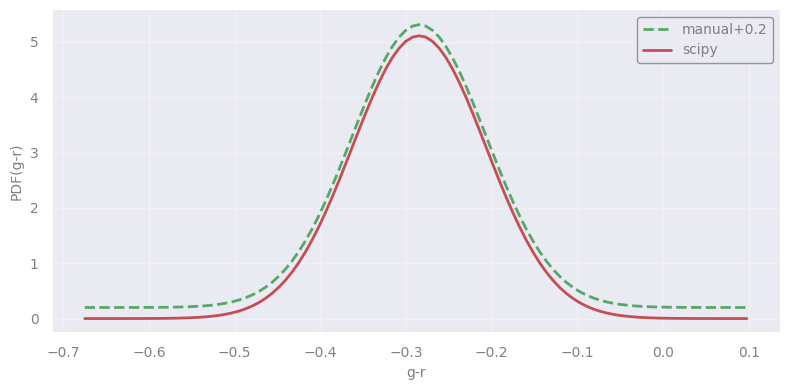

In [11]:
import scipy.stats as st

# taking the PDF of a Gaussian distribution
pdf = st.norm.pdf(x_values, loc=sample_mean, scale=sample_std)

# comparing with our "manual" PDF
offset = 0.2
plt.plot(x_values, y_values+offset, "g--", label=f"manual+{offset}" )
plt.plot(x_values, pdf, "r-", label="scipy")
plt.xlabel('g-r')
plt.ylabel('PDF(g-r)')
plt.legend()
plt.show()

Let's take a look in a number of distributions:

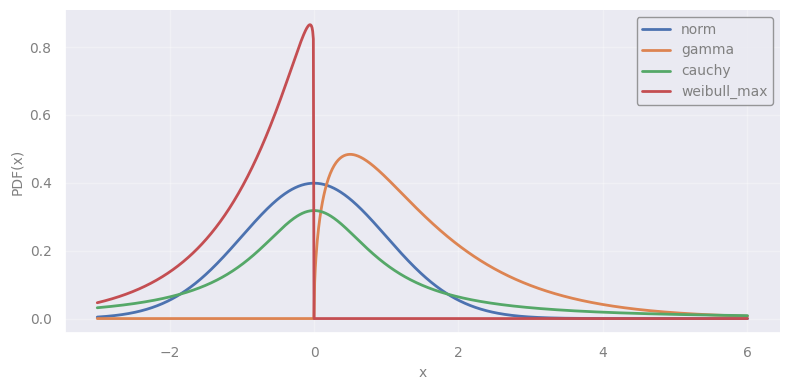

In [12]:
x_points = np.linspace(-3, 6.0, 1000)

# various distributions to try
distributions = [
    st.norm(),
    st.gamma(1.5),
    st.cauchy(),
    st.weibull_max(1.05),
]

plt.figure()
for distribution in distributions:
    pdf = distribution.pdf(x_points)
    plt.plot(x_points, pdf, label=distribution.dist.name, lw=2)
plt.legend(loc="upper right")
plt.ylabel("PDF(x)")
plt.xlabel("x")
plt.show()

## The cumulative distribution function

Simply, the probability of "less than a value":

$$\Large F(x) = \int\limits_{-\infty}^{x} f(x')\,dx'$$

where $f(x)$ is the probability density function.

Let's see how it looks with using the previous set of distributions:

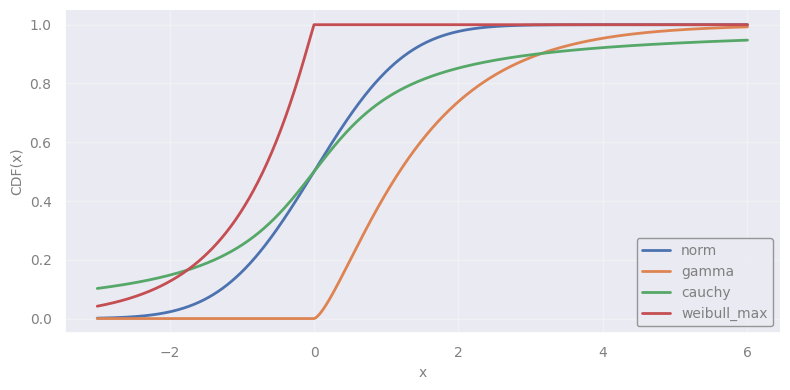

In [13]:
for distribution in distributions:
    cdf = distribution.cdf(x_points)
    plt.plot(x_points, cdf, label=distribution.dist.name, lw=2)
plt.legend(loc="lower right")
plt.ylabel("CDF(x)")
plt.xlabel("x")
plt.show()

Notice the difference between the various distibutions (e.g. for a population following the Weibull distribution the peak is achieved much faster rather than the Gamma one). 

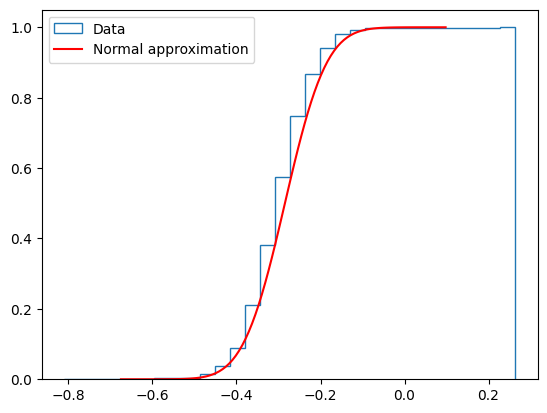

In [9]:
sample_mean = np.mean(g_r)
sample_std = np.std(g_r)

distribution = st.norm(sample_mean, sample_std)
x_values = np.arange(sample_mean-5*sample_std, sample_mean+5*sample_std, sample_std/10.0)

plt.figure()
plt.hist(g_r, bins=30, density=True, cumulative=1, histtype="step", label="Data")
plt.plot(x_values, distribution.cdf(x_values), "r-", label="Normal approximation")
plt.legend(loc="upper left")
plt.show()

<div class="alert alert-block alert-warning" style="margin-top: 20px">

# Exercise 2:

**Objective:** Draw the sample and the corresponding normal cumulative distributions.

**Task:** Similar to the previous exercise, fill in the missing code in order to plot the CDFs for the sample and its corresponding Gaussian distribution. 
    
> TIP: Use the option `cumulative=1` for the `plt.hist()` converts automatically the plot. </div>

-0.284704658013544 0.07806358346006693


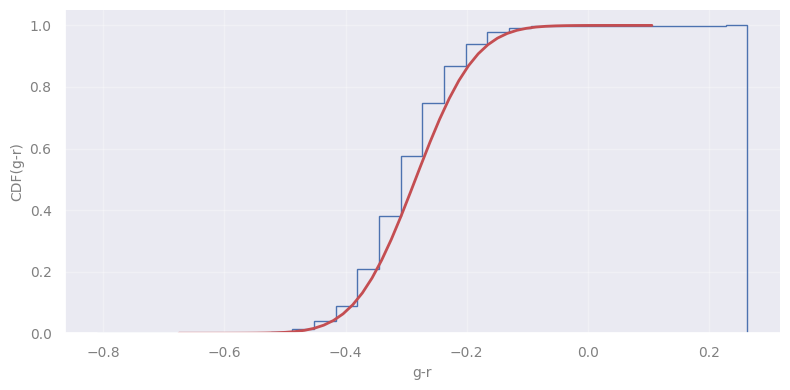

In [14]:
sample_mean = np.mean(g_r)
sample_std = np.std(g_r)

print(sample_mean, sample_std)
# let's plot 5 sigmas around the mean value...
x_values = np.linspace(sample_mean-5*sample_std, 
                     sample_mean+5*sample_std, 50)

# ...the Gaussian CDF
cdf = st.norm.cdf(x_values, loc=sample_mean, scale=sample_std)

plt.hist(g_r, bins=30, density=True, 
         cumulative=1, histtype="step", label="Data")
plt.plot(x_values, cdf, "r-", label='CDF')
plt.xlabel('g-r')
plt.ylabel('CDF(g-r)')
plt.show()

# Discrete variables

## Probability mass function

Let's go back to the discrete case! Events A, B, ... do not necessarily have an order. However, there are cases where the events have an order, typically when they are numerical. For example, the numbers of astronomical objects in a certain galaxy/volume/region in Milky Way, or the photon counts in high energy astrophysics, are Poisson-distributed.

Let's plot the probability of getting 0, 1, ... counts when the mean photon count is known (assuming Poisson distribution). We will use the `.pmf()` method. 

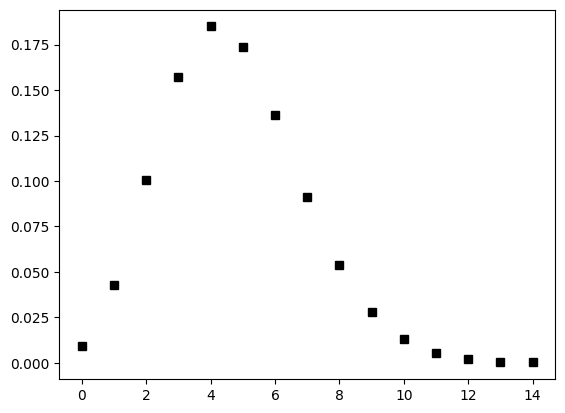

In [10]:
mean_photon_count = 4.7
distribution = st.poisson(mean_photon_count)

photon_counts = np.arange(0, mean_photon_count*3)
photon_pmf = distribution.pmf(photon_counts)

plt.figure()
plt.plot(photon_counts, photon_pmf, "ks")
plt.show()

This is not a probability density any more. We have a measurable probability for 0, 1, 2, 3, ... photons! We often use different letters to signify the integer values of such probability mass functions ($k$, $l$, $m$). Thus,

$$ \Large \sum\limits_{k=0}^{\infty} P(k) = 1 $$

Let's test this with the values in the plot:

In [11]:
sum(photon_pmf)

0.9998822825234644

## CDF of discrete distributions

The cumulative distribution function is always an integral even if the variable is discrete.

However, because of the discrete nature of the probability mass function, it's a **discontinuous** function:

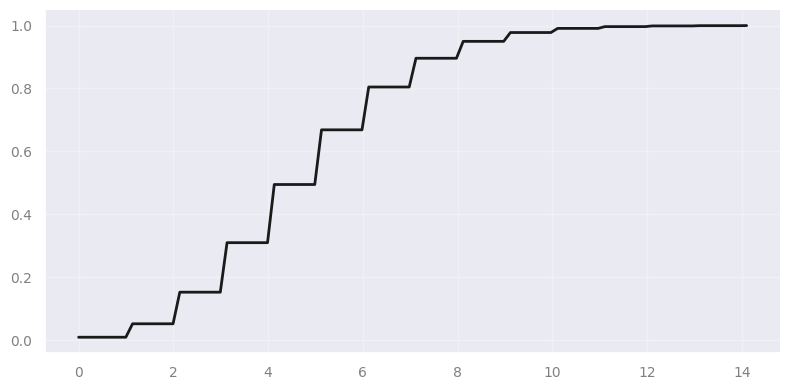

In [15]:
mean_photon_count = 4.7
distribution = st.poisson(mean_photon_count)


xx = np.linspace(0, mean_photon_count*3, 100)
photon_cdf = distribution.cdf(xx)

plt.figure()
plt.plot(xx, photon_cdf, "k-")
plt.show()

<div class="alert alert-block alert-warning" style="margin-top: 20px">

# Exercise 3: 

**Objective:** Working with probability density/mass functions

**Task:** In this exercise you are asked to fill in the missing code in order to plot a sample from a specific distribution (two options) and calculate various characteristic properties. More specifically:
    
1. Make a sample of 10000 points from the distribution </br>(*hint:* use the [.rvs()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sampling.TransformedDensityRejection.rvs.html#rvs) method, that generates random samples from a distribution). Plot the sample using a histogram.

2. Make and plot the pdf and cdf of the distribution.

3. Calculate the mean, median, standard deviation of the distribution.

4. Calculate the 5% percentile <br>
(*hint:* use the [.ppf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.ppf.html#ppf) method, that finds the point of the distribution that satisfies the given percent).

5. Find the 68% confidence interval<br>
(*hint:* use the [.interval()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.interval.html#interval) method)

</div>


Standard deviation: 1.5906


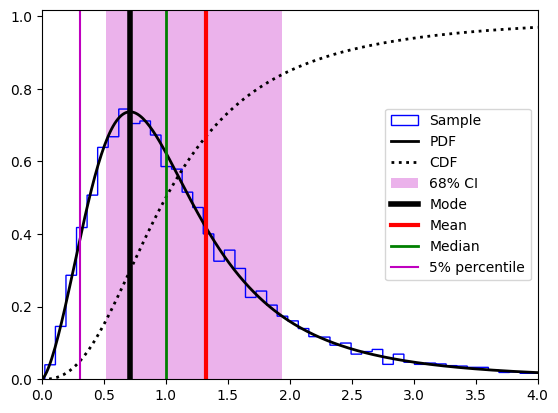

In [13]:
# the plotting range
x_points = np.linspace(0.0, 4.0, 300)

# dist = st.norm(2.0, 0.35)

# the Fisk (or lof-logistic) distribution to use, 
# check https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisk.html
dist = st.fisk(2.5)

# draw a (large) sample from the distribution
sample = dist.rvs(size=10000)

# calculate the PDF in the plotting range
pdf = dist.pdf(x_points)

# calculate the CDF in the plotting range
cdf = dist.cdf(x_points)

# compute the mean, median, and standard deviation
mean = dist.mean()
median = dist.median()
std = dist.std()

# find the 5% percentile, and the 68% confidence interval
p05 = dist.ppf(0.05)
lo68, hi68 = dist.interval(0.68)

# search for the maximum of the distribution (mode)
mode = minimize(lambda x: -dist.pdf(x), x0=median).x


# report what we found

print(f"Standard deviation: {std:.4f}")

plt.figure()
plt.hist(sample, bins="fd", density=True,
         histtype="step", color="b", lw=1, label="Sample")
plt.plot(x_points, pdf, "k-", lw=2, label="PDF")
plt.plot(x_points, cdf, "k:", lw=2, label="CDF")
plt.axvspan(lo68, hi68, color="m", alpha=0.3, ec="none", label="68% CI")
plt.axvline(mode, color="k", ls="-", lw=4, label="Mode")
plt.axvline(mean, color="r", ls="-", lw=3, label="Mean")
plt.axvline(median, color="g", lw=2, label="Median")
plt.axvline(p05, color="m", label="5% percentile")
plt.legend(loc="center right")
plt.xlim(0.0, 4.0)
plt.ylim(ymin=0.0)
plt.show()

Notice that when the distribution is not symmetric:
1. The normal CI, has edges with different probability density! It's not selecting regions of high probability necessarily
2. The mode... is the most probably value. Typically we search for that in many statistical operations... and it's not given by standard functions (e.g., mean)
3. Knowing the distributions of your data, statistics, etc., and knowing how to work with them can make a huge difference!